In [2]:
from cfg import *

/home/ntimonidis/Brain-Connectivity Project/25 3 2019


In [3]:
import PrimaryLibrary as PL
imp.reload(PL)

clear_output()

In [4]:
GeneExp        = h5py.File('G_Exp.hdf5', 'r')['dataset1']
ConDict        = pk.load(open('CreLineDict.pkl','rb'))

In [5]:
MesoPred         = PL.MesoconnectomePredictor()
#upd_params  = pk.load(open('updated_params.pkl','rb'))
a,b,c,d = MesoPred.PreProcessing(GeneExp[MesoPred.params['leaf_keys'],:],MesoPred.params,ConDict['wild_type']['ConMat'][MesoPred.params['leaf_keys'],:])
clear_output()

In [5]:
print np.shape(GeneExp[MesoPred.params['leaf_keys'],:])[0]  

1038


In [6]:
ClfResults_ridge = {}; 
MesoPred.params           = pk.load(open('updated_params.pkl','rb'))
for key in ConDict.keys():
    if os.path.isfile('saves/' + key + '_all_results' + '_ridge.pkl') == True:
        infile = 'saves/' + key + '_all_results' + '_ridge.pkl'
        print infile
        tmp = pk.load(open(infile,'r'))
        ClfResults_ridge[key] = {key:val for key,val in tmp.items()}
         
clear_output()      

In [7]:
for key in ['Cux2-IRES-Cre']:
    top_tracer = np.argsort(ClfResults_ridge[key]['r2'])[1][0]
    print top_tracer, ClfResults_ridge[key]['r2'][top_tracer], MesoPred.ConDict[key]['structure-abbrev'][top_tracer]

0 [ 0.82621473] AId


In [8]:
np.unique(MesoPred.targetprofiles['alt laminar profiles'])

array(['layer 1', 'layer 2/3', 'layer 4', 'layer 5', 'layer 6a',
       'layer 6b', 'layer inspecific', 'other profiles'], 
      dtype='|S16')

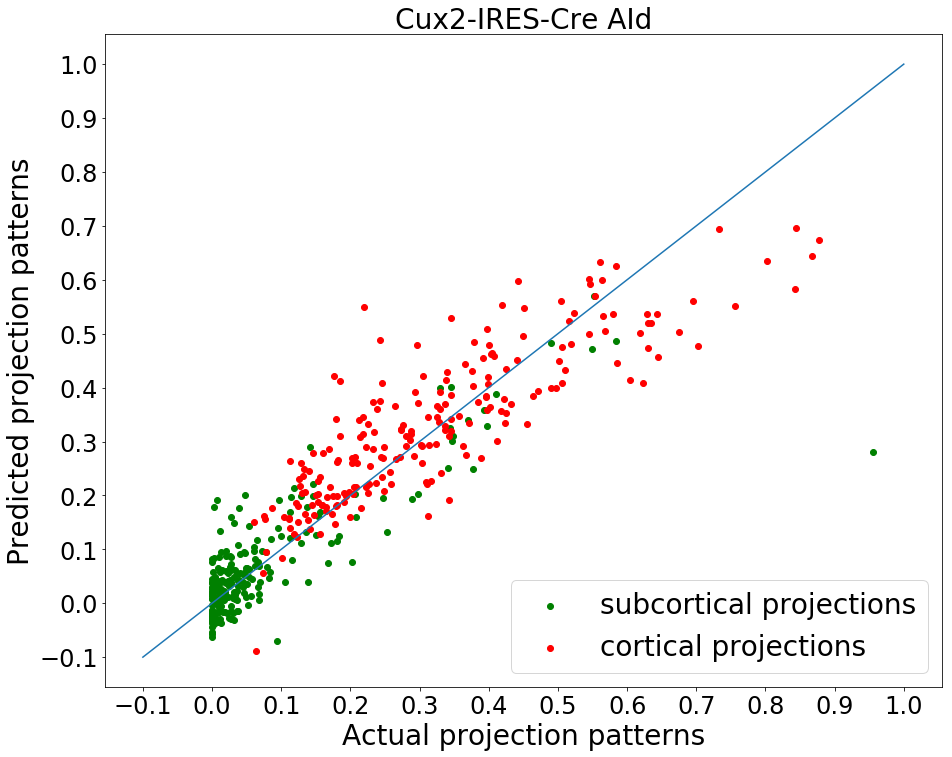

In [21]:
#A = ClfResults_ridge[key]['y_actual'][:,top_tracer]
#B = ClfResults_ridge[key]['y_preds'][:,top_tracer]
#laminar_profs = [MesoPred.targetprofiles['alt laminar profiles'][val] for val in MesoPred.params['remaining_indices']]
#pk.dump(A, open('paper1_figures/A_for_scatter.pkl','wb'))
#pk.dump(B, open('paper1_figures/B_for_scatter.pkl','wb'))
#pk.dump(laminar_profs, open('paper1_figures/laminar_for_scatter.pkl','wb'))

A                   = pk.load(open('paper1_figures/A_for_scatter.pkl','rb'))
B                   = pk.load(open('paper1_figures/B_for_scatter.pkl','rb'))
laminar_profs       = pk.load(open('paper1_figures/laminar_for_scatter.pkl','rb'))

resids              = abs(A-B)

remaining_indices   = np.asarray([MesoPred.targetprofiles['str_acronym'][val] for val in MesoPred.params['remaining_indices']])
subcortical_indices = [idx for idx,val in enumerate(laminar_profs) 
                       if val == 'layer inspecific' or val == 'other profiles']
cortical_indices    = [idx for idx,val in enumerate(laminar_profs) 
                       if val != 'layer inspecific' and val != 'other profiles']

subcortical_bad     = remaining_indices[subcortical_indices][np.argsort(resids[subcortical_indices])[::-1][0:50]]
subcortical_good    = remaining_indices[subcortical_indices][np.argsort(resids[subcortical_indices])[0:50]]
cortical_bad        = remaining_indices[cortical_indices][np.argsort(resids[cortical_indices])[::-1][0:10]]
cortical_good       = remaining_indices[cortical_indices][np.argsort(resids[cortical_indices])[0:10]]

plt.figure(figsize = (15,12))
plt.xticks(np.arange(-0.1,1.05,0.1))
plt.yticks(np.arange(-0.1,1.05,0.1))
plt.scatter(A[subcortical_indices],B[subcortical_indices], c = 'g')
plt.legend()
plt.scatter(A[cortical_indices],B[cortical_indices], c = 'r')
plt.legend(['subcortical projections','cortical projections'],loc="lower right", prop={'size': 28})
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 24)
ax.yaxis.set_tick_params(labelsize = 24)
#plt.axis('scaled')
plt.xlabel('Actual projection patterns', fontsize = 28)
plt.ylabel('Predicted projection patterns', fontsize = 28)
plt.title('Cux2-IRES-Cre AId', fontsize = 28)
plt.plot((-0.1,1),(-0.1,1))
#plt.plot((0,1),(0,1))
plt.savefig('paper1_figures/scatter_plot_for_aid.jpg')
plt.savefig('paper1_figures/scatter_plot_for_aid.eps')
plt.show()

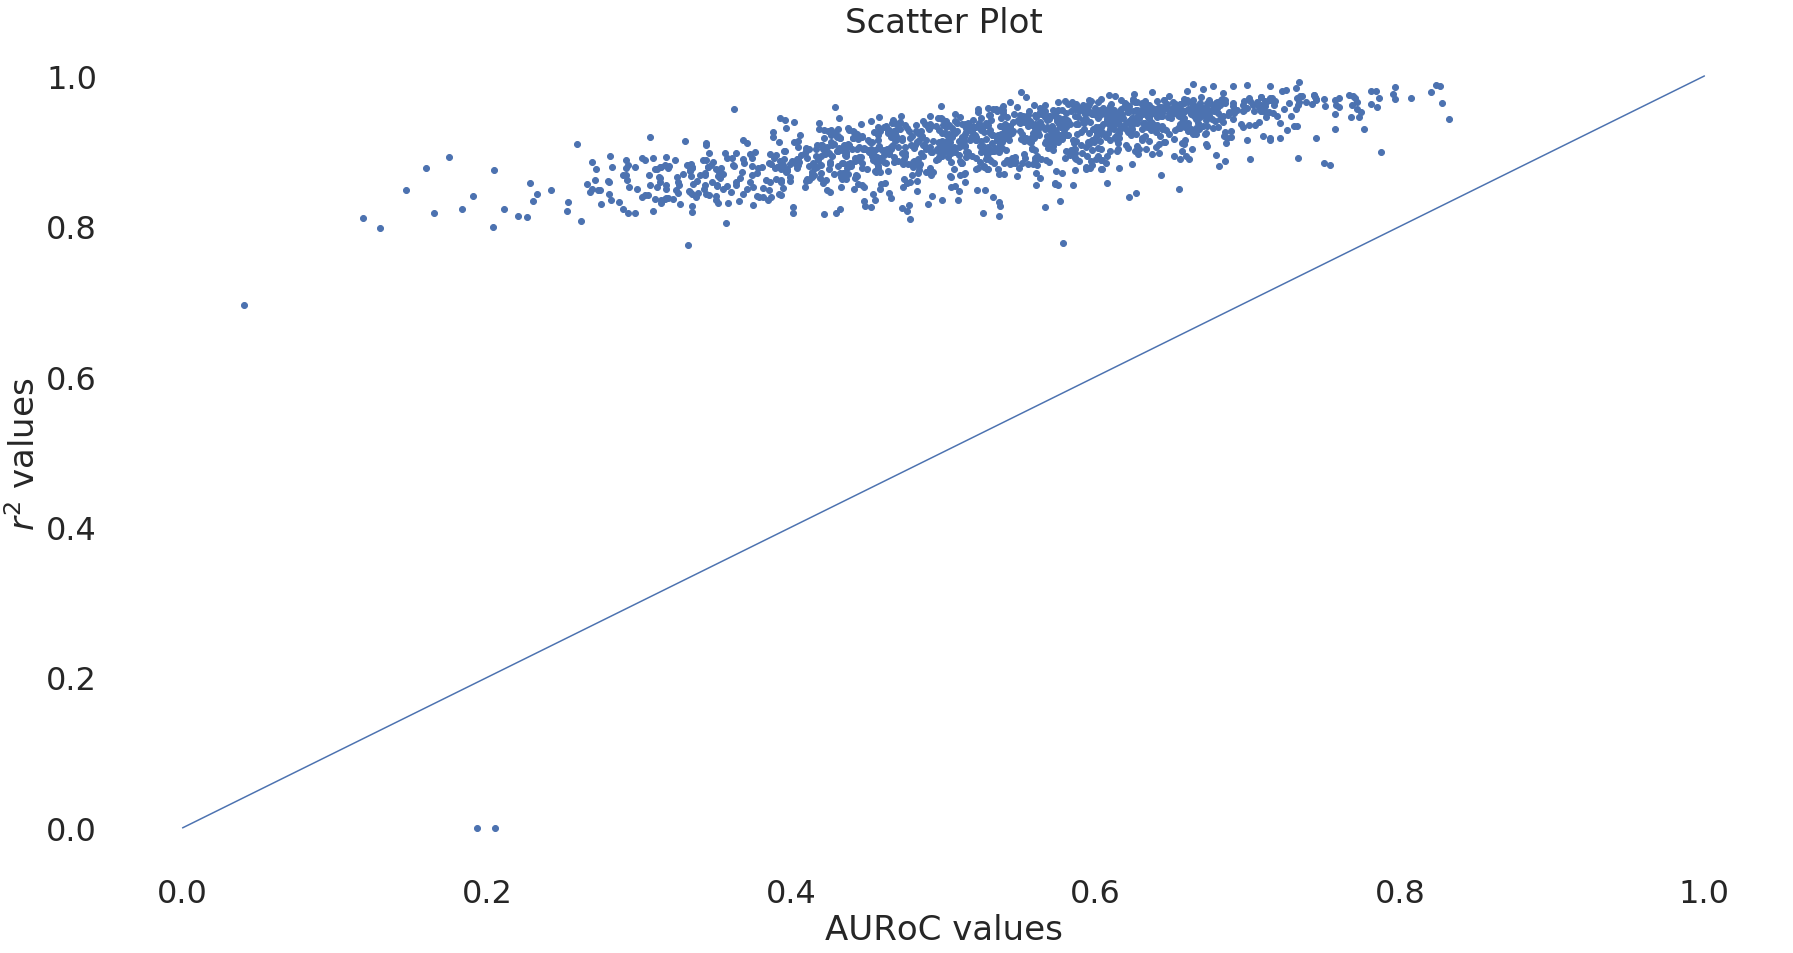

In [142]:
team_ridge = [list(pred) for key in MesoPred.ConDict.keys() for pred in ClfResults_ridge[key]['r2']]
team_auc = [list(pred) for key in MesoPred.ConDict.keys() for pred in ClfResults_ridge[key]['AURoc']]

plt.scatter(team_ridge, team_auc)
plt.plot((0,1),(0,1))
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 32)
ax.yaxis.set_tick_params(labelsize = 32)
plt.xlabel('AURoC values', fontsize = 34)
plt.ylabel(r'$r^2$ values', fontsize = 34)
plt.title('Scatter Plot', fontsize = 34)
plt.savefig('paper1_figures/r2_to_auc.jpg')
plt.savefig('paper1_figures/r2_to_auc.eps')
plt.show()

In [ ]:
cutoff_col = {}
for driver_line in ClfResults_ridge.keys():
    print driver_line
    ClfResults_ridge[driver_line]['cutoff'] = MesoPred.Convert2ROC(ClfResults_ridge[driver_line]['y_actual'],
                                                                   ClfResults_ridge[driver_line]['y_preds'])
    print 'driver line: {} - cutoff example: {}'.format(driver_line, ClfResults_ridge[driver_line]['cutoff'][0][0]*0.01)
    
    

In [6]:
ClfResults_rf = {};  
path = 'RF_NUll_backup/'
for element in os.listdir(path):
    if 'all_results_ridge.pkl' in element:
        driver =  element.split('_all_')[0]
        print driver
        tmp = pk.load(open(path + element,'rb'))
        ClfResults_rf[driver] = tmp['r2']
         
clear_output()      

OSError: [Errno 2] No such file or directory: 'RF_NUll_backup/'

### Ridge Regression outperforms Random Forest with a median r2 score over all 1397 tracers of 0.54 instead of 0.42

In [23]:
JoinResults = pk.load(open('paper1_figures/rf_ridge_Results.pkl','rb'))
RF_r2_scores = [val[1] for val in JoinResults]
rf_med =  np.median(RF_r2_scores)
rf_iqr =  sci.stats.iqr(RF_r2_scores)
rf_outcasts = [val for val in RF_r2_scores if val < 0.2]

RR_r2_scores = [val[0] for val in JoinResults]
rr_med =  np.median(RR_r2_scores)
rr_iqr =  sci.stats.iqr(RR_r2_scores)
rr_outcasts = [val for val in RR_r2_scores if val < 0.2]
print len(rf_outcasts)/(1.0*1397), len(rr_outcasts)/(1.0*1397)

0.0286327845383 0.00715819613457


In [24]:
len(rf_outcasts)

40

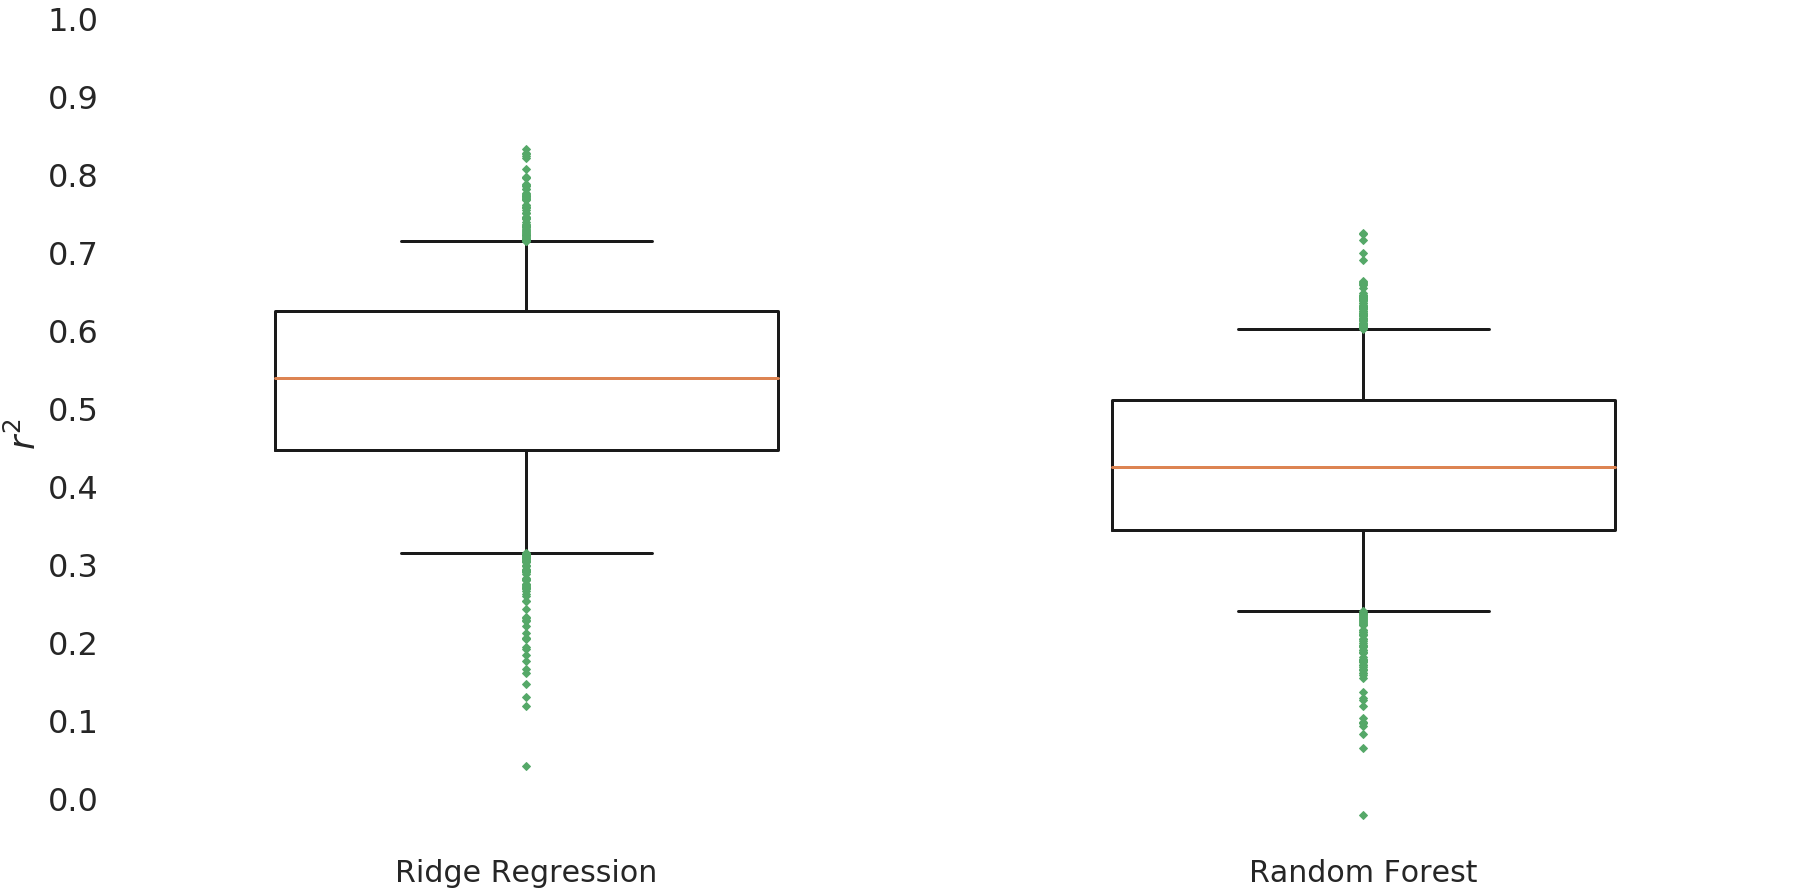

<Figure size 2160x1099.44 with 0 Axes>

In [146]:
#team_rf    = [list(pred) for key in MesoPred.ConDict.keys() for pred in ClfResults_rf[key]]
#team_ridge = [list(pred) for key in MesoPred.ConDict.keys() for pred in ClfResults_ridge[key]['r2']]
#print np.median(team_rf),np.median(team_ridge), sci.stats.iqr(team_rf), sci.stats.iqr(team_ridge)
#JoinResults = np.asarray([(a[0],b[0]) for a,b in zip(team_ridge, team_rf)])
#pk.dump(JoinResults, open('paper1_figures/rf_ridge_Results.pkl','wb'))
JoinResults = pk.load(open('paper1_figures/rf_ridge_Results.pkl','rb'))

ax = plt.gca()
#sns.set(style="whitegrid")
#sns.boxplot(data = pd.DataFrame(JoinResults))
box = plt.boxplot(JoinResults,0, 'gD', widths = 0.6, whis = [5,95])

#plt.tight_layout()
plt.rcParams['figure.figsize']
plt.rcParams['axes.facecolor'] = 'white'
plt.ylabel(r'$r^2$', fontsize = 35)
plt.xticks([i+1 for i in range(2)], ['Ridge Regression','Random Forest'],rotation = 0)
ax.xaxis.set_tick_params(labelsize = 30)
ax.yaxis.set_tick_params(labelsize = 32)
plt.yticks(np.arange(0,1.1,0.1))
for key in box.keys():
    for bp in box[key]:
        bp.set(linewidth = 3)
plt.savefig('paper1_figures/Ridge Regression - Random Forest comparison.jpg')
plt.savefig('paper1_figures/Ridge Regression - Random Forest comparison.eps')
plt.show()
plt.clf()

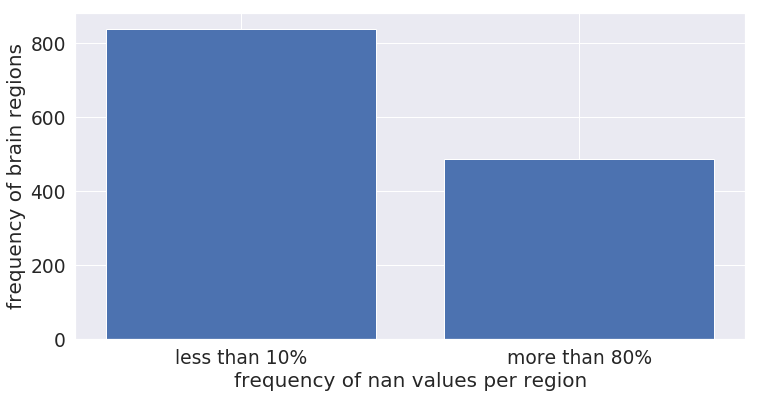

In [63]:
#B = np.asarray(MesoPred.ConDict['wild_type']['ConMat'])
#pk.dump(B, open('paper1_figures/ConMat_for_hist.pkl','wb'))

B = pk.load(open('paper1_figures/ConMat_for_hist.pkl','rb'))
nan_freq = [len(con_area[np.isnan(con_area)])/(1.0*len(con_area)) for idx, con_area in enumerate(B)]
group_1 = len([val for val in nan_freq if val < 0.1])
group_2 = len([val for val in nan_freq if val > 0.8])
plt.figure(figsize = (12,6))
#plt.hist(np.asarray(nan_freq))
group_labels = ['less than 10%','more than 80%']
plt.bar(group_labels,[group_1,group_2])
plt.ylabel('frequency of brain regions', fontsize = 20)
plt.xlabel('frequency of nan values per region', fontsize = 20)
plt.savefig('paper1_figures/nan_histogram2.jpg')
plt.savefig('paper1_figures/nan_histogram2.eps')

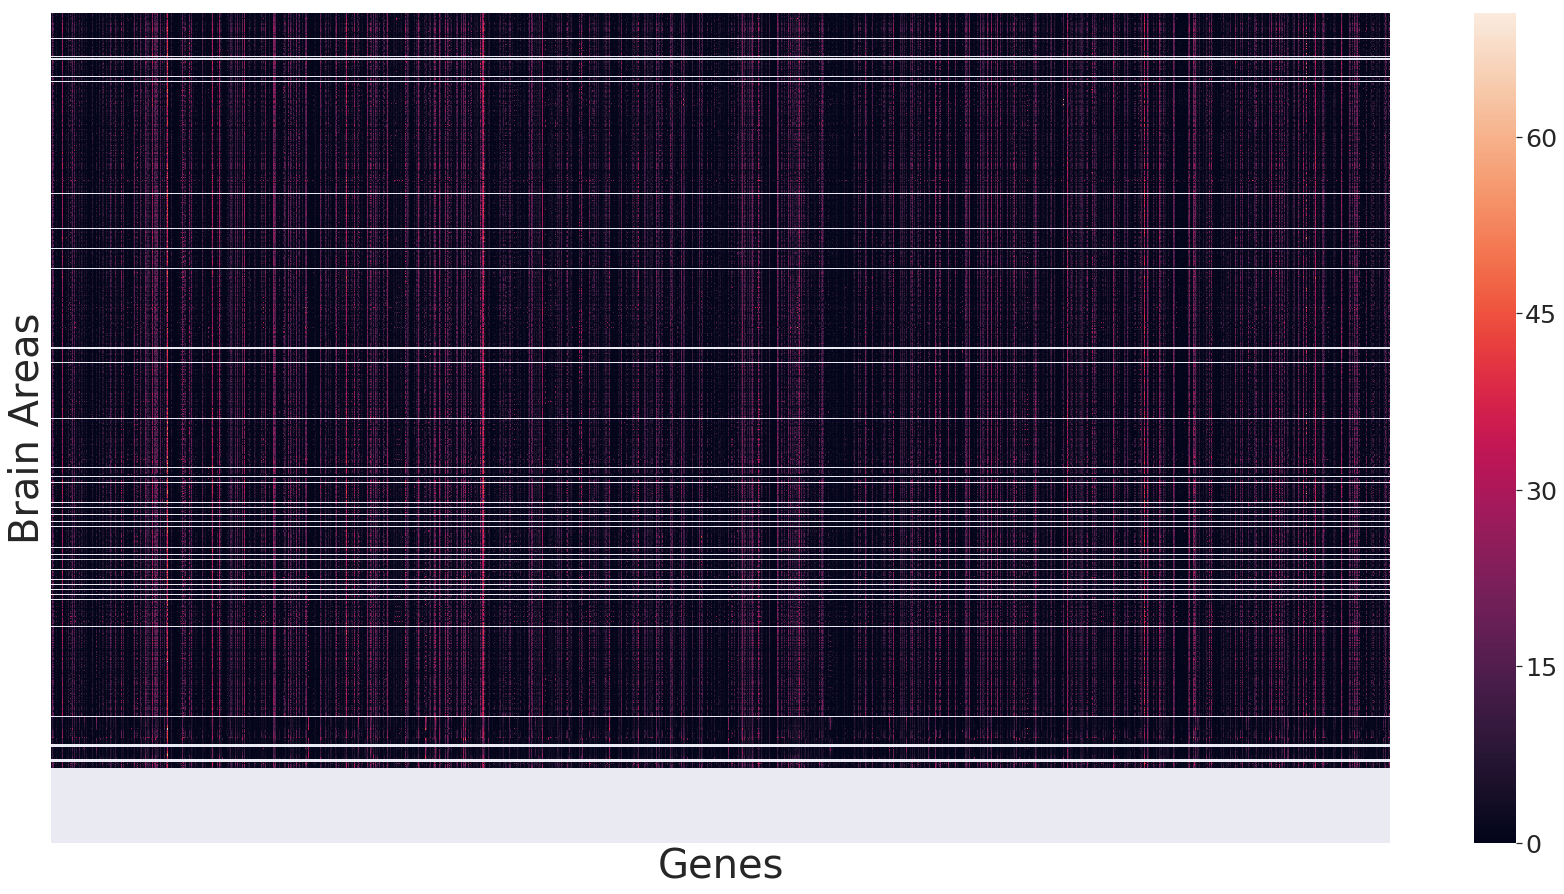

In [19]:
import seaborn as sns
#df = pd.DataFrame(data = np.asarray(GeneExp))
#pk.dump(df, open('paper1_figures/nan_gene_mat.pkl','wb'))

df = pk.load(open('paper1_figures/nan_gene_mat.pkl','rb'))

sns.heatmap(df, yticklabels = [], xticklabels = [])
sns.set(rc={'figure.figsize':(30,15.27)},font_scale = 2.3)
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
plt.xticks(rotation = 290)
plt.xlabel('Genes', fontsize = 40)
plt.ylabel('Brain Areas', fontsize = 40)
plt.savefig('paper1_figures/nan_gene_heatmap.jpg')
plt.savefig('paper1_figures/nan_gene_heatmap.eps')

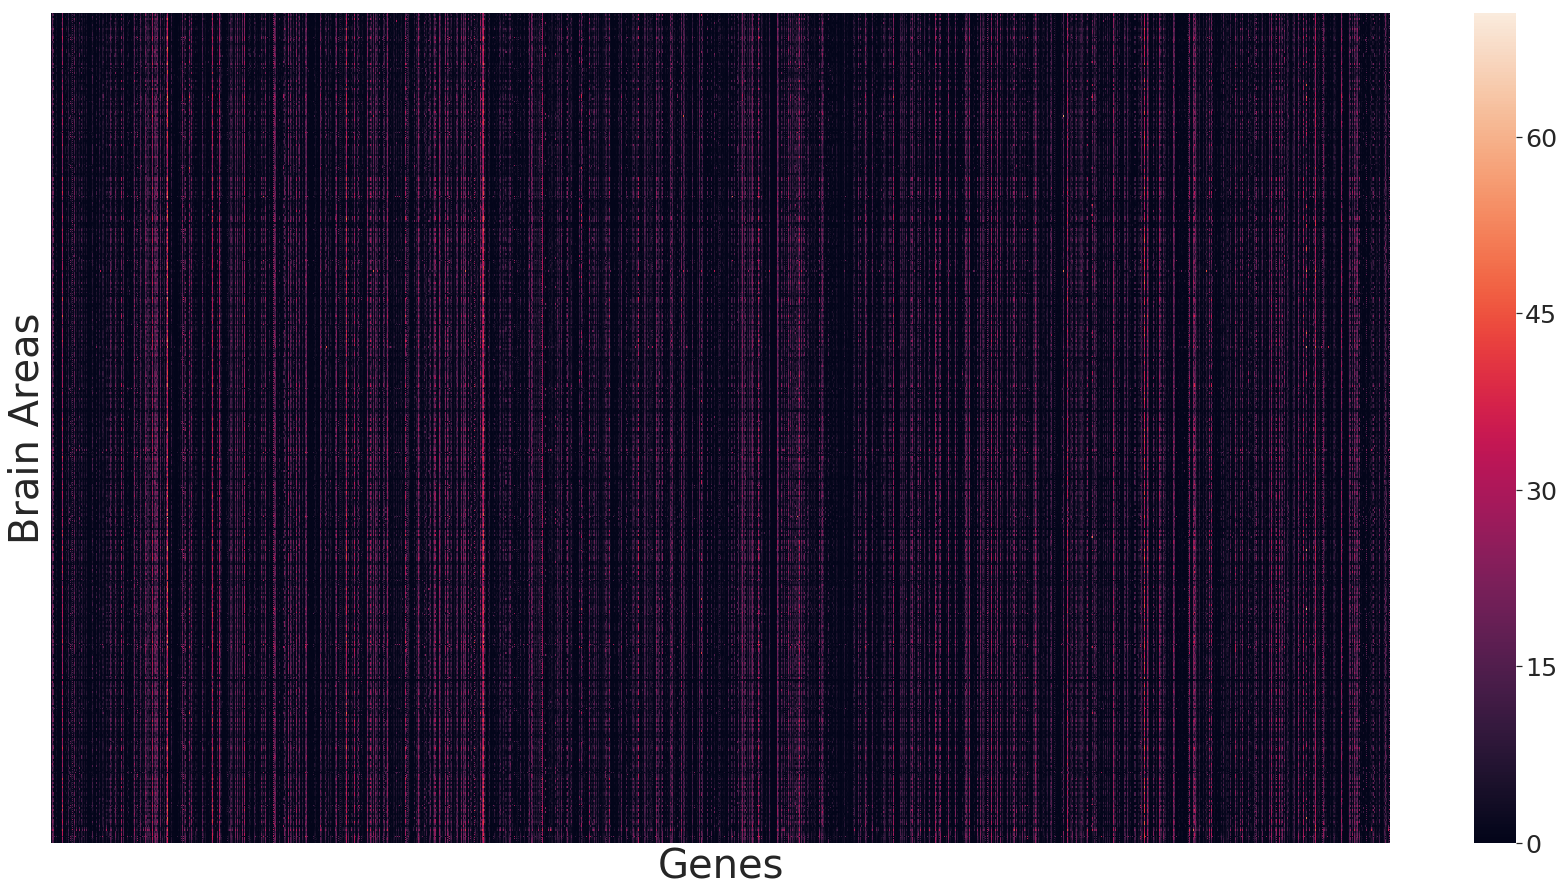

In [20]:
import seaborn as sns
#df = pd.DataFrame(data = np.asarray(GeneExp_im), index = reduced_acros, columns = MesoPred.params['Gene Acronyms'])
#pk.dump(df, open('paper1_figures/imputed_gene_mat.pkl','wb'))
df = pk.load(open('paper1_figures/imputed_gene_mat.pkl','rb'))

sns.set(rc={'figure.figsize':(30,15.27)},font_scale = 2.3)
sns.heatmap(df, yticklabels = [], xticklabels = [])
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
plt.xticks(rotation = 290)
plt.xlabel('Genes', fontsize = 40)
plt.ylabel('Brain Areas', fontsize = 40)
plt.savefig('paper1_figures/nan_gene_imputation_1.jpg')
plt.savefig('paper1_figures/nan_gene_imputation_1.eps')

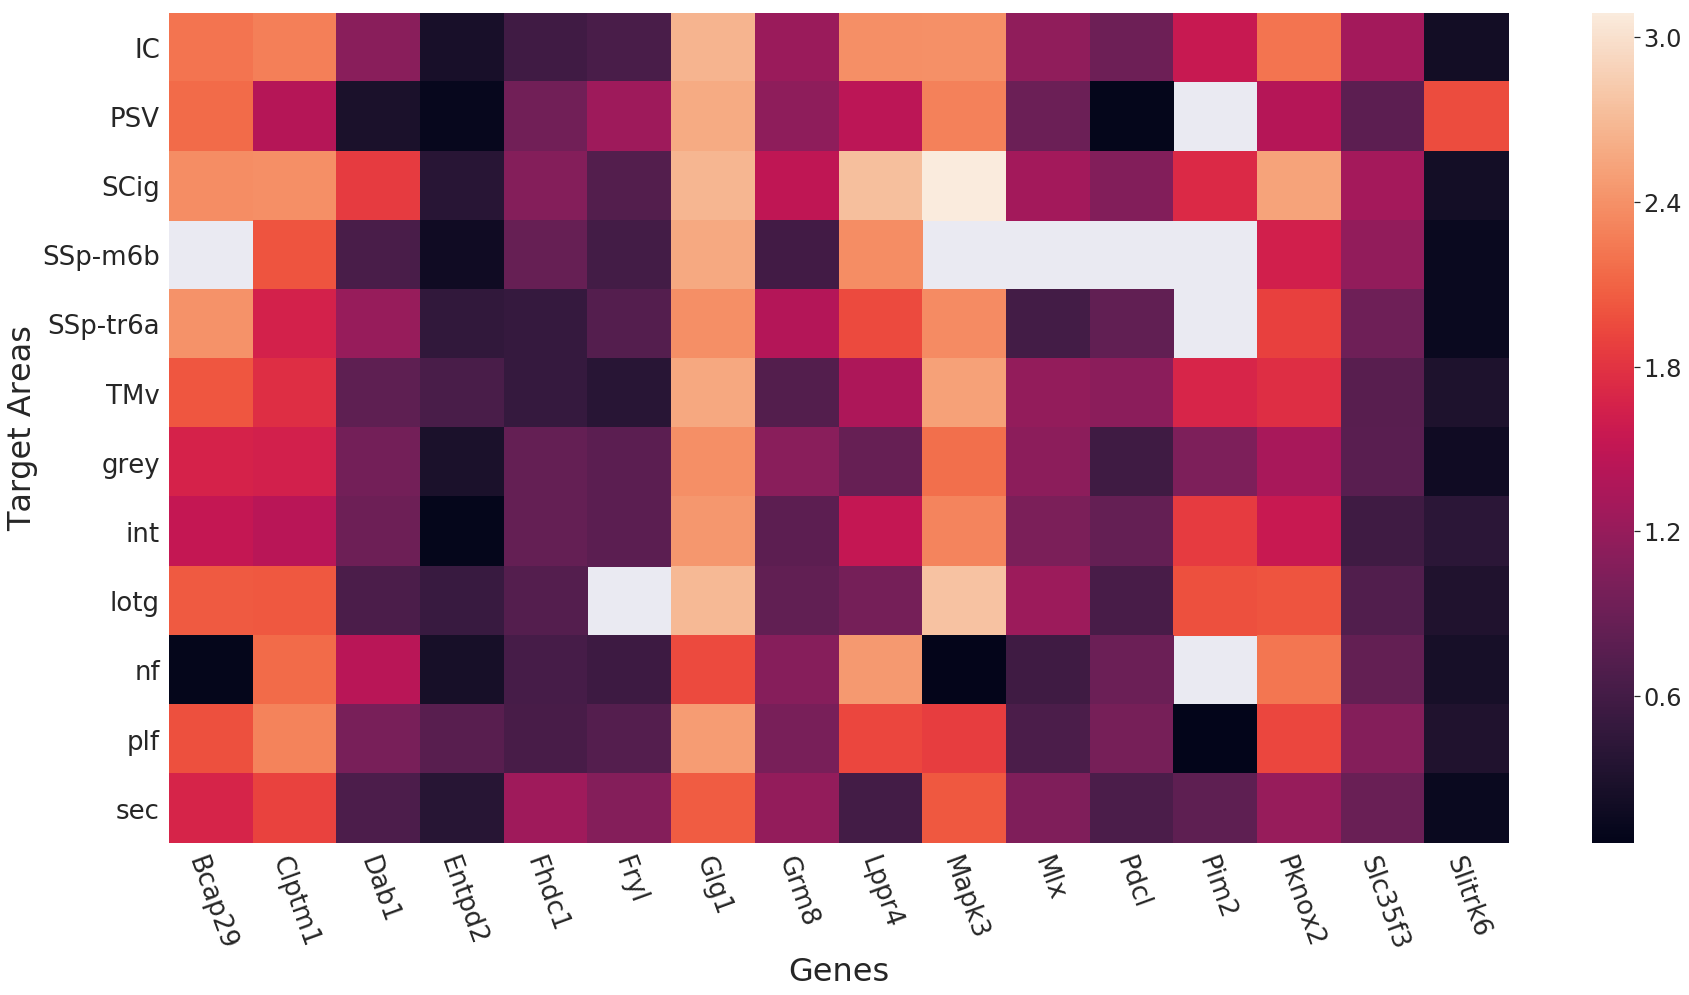

In [25]:
#df_im = pd.DataFrame(data = np.power(B, 1./3), index = sel_acros, columns = sel_genes)
#pk.dump(df_im, open('paper1_figures/nan_gene_submat.pkl','wb'))
df_im = pk.load(open('paper1_figures/nan_gene_submat.pkl','rb'))

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 26)
ax.yaxis.set_tick_params(labelsize = 26)
sns.set(rc={'figure.figsize':(30,15.27)},font_scale = 2.2)
sns.heatmap(df_im)
plt.xticks(rotation = 290)
plt.xlabel('Genes', fontsize = 32)
plt.ylabel('Target Areas', fontsize = 32)
plt.savefig('paper1_figures/nan_gene_imputed_step1.jpg')
plt.savefig('paper1_figures/nan_gene_imputed_step1.eps')

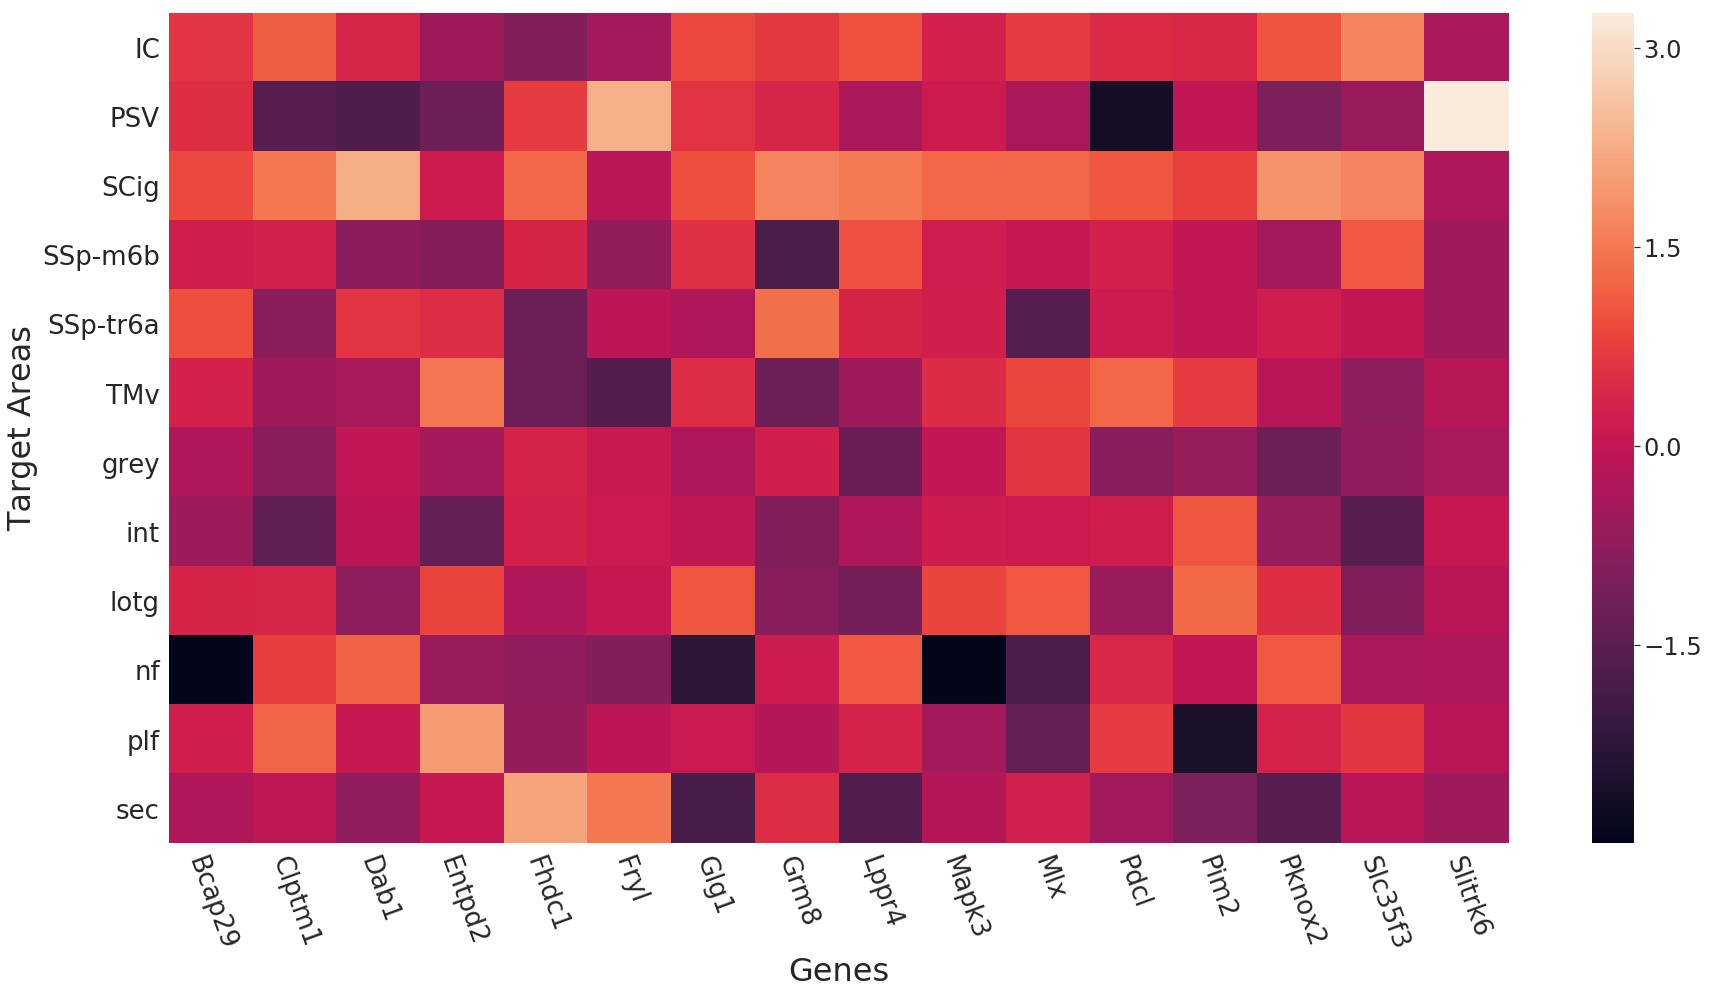

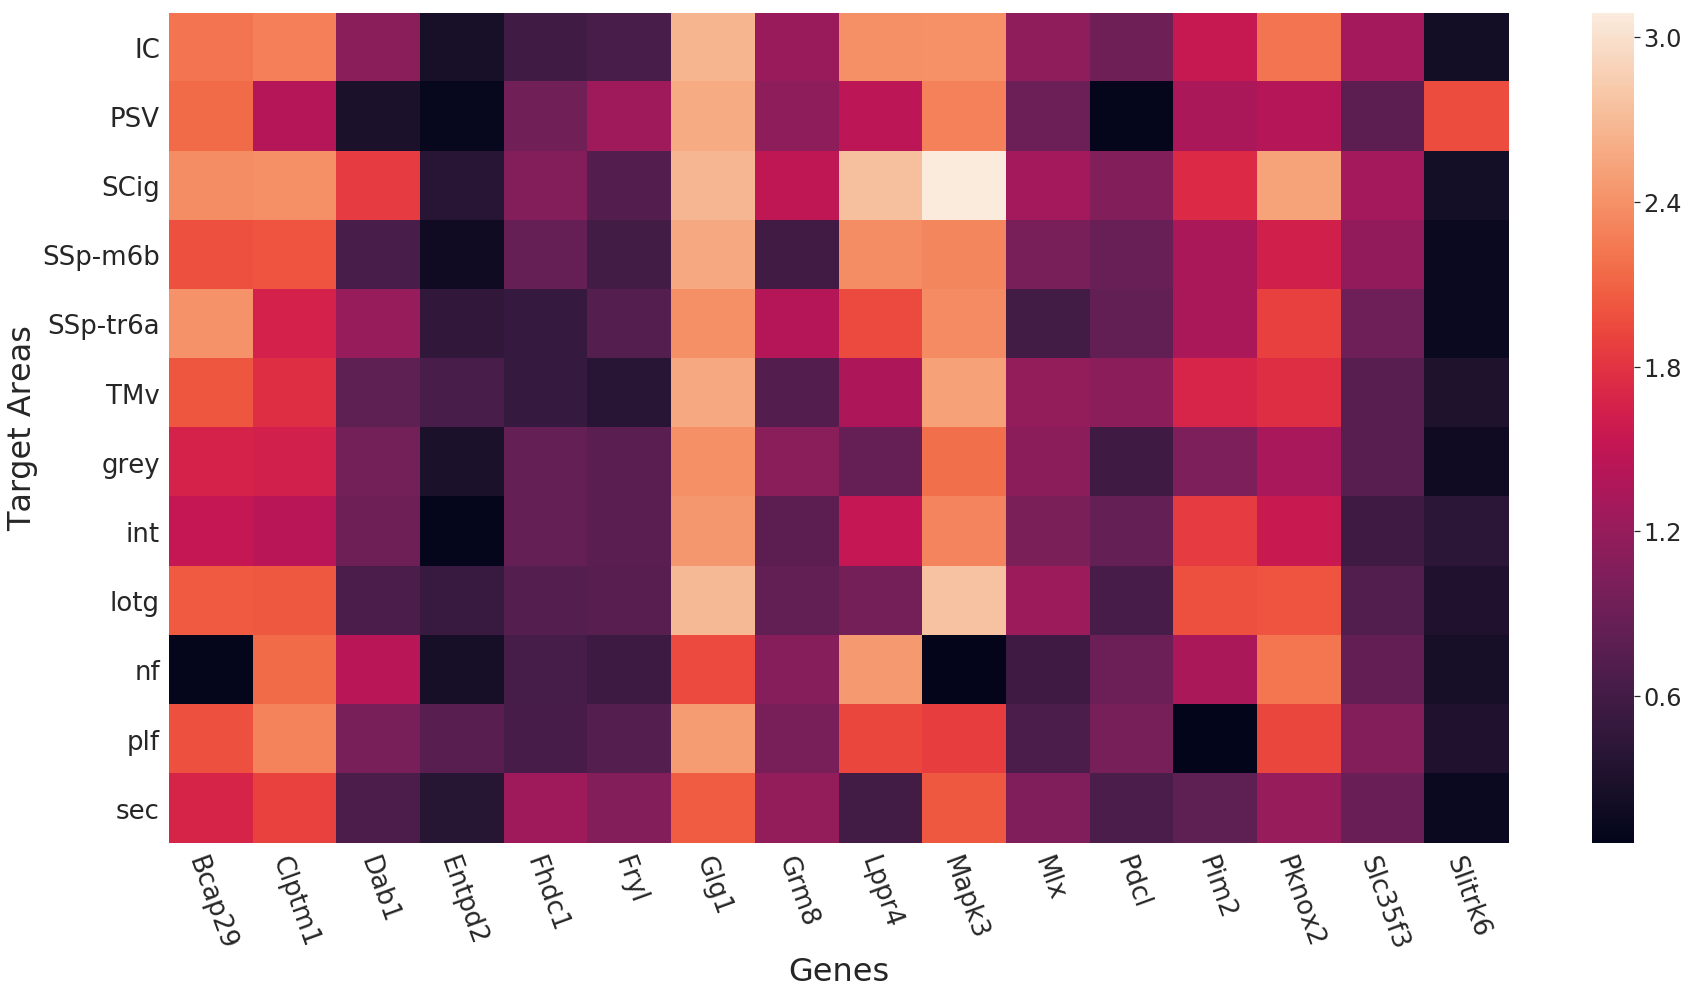

In [26]:
#df_im = pd.DataFrame(data = np.power(B2, 1./3), index = sel_acros,columns = sel_genes)
#pk.dump(df_im, open('paper1_figures/imputed_gene_submat.pkl','wb'))
#df_im = pd.DataFrame(data = StandardScaler().fit_transform(np.power(B2, 1./3)), index = sel_acros, columns = sel_genes)
#pk.dump(df_im, open('paper1_figures/zscore_gene_submat.pkl','wb'))

df_im = pk.load(open('paper1_figures/zscore_gene_submat.pkl','rb'))
plt.figure
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 26)
ax.yaxis.set_tick_params(labelsize = 26)
sns.set(rc={'figure.figsize':(30,15.27)}, font_scale = 2.2)
sns.heatmap(df_im)
plt.xticks(rotation = 290)
plt.xlabel('Genes', fontsize = 32)
plt.ylabel('Target Areas', fontsize = 32)
plt.savefig('paper1_figures/gene_exp_zscored.jpg')
plt.savefig('paper1_figures/gene_exp_zscored.eps')
plt.show()

df_im = pk.load(open('paper1_figures/imputed_gene_submat.pkl','rb'))
plt.figure
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 26)
ax.yaxis.set_tick_params(labelsize = 26)
sns.set(rc={'figure.figsize':(30,15.27)}, font_scale = 2.2)
sns.heatmap(df_im)
plt.xticks(rotation = 290)
plt.xlabel('Genes', fontsize = 32)
plt.ylabel('Target Areas', fontsize = 32)
plt.savefig('paper1_figures/nan_gene_imputed_step2.jpg')
plt.savefig('paper1_figures/nan_gene_imputed_step2.eps')
plt.show()



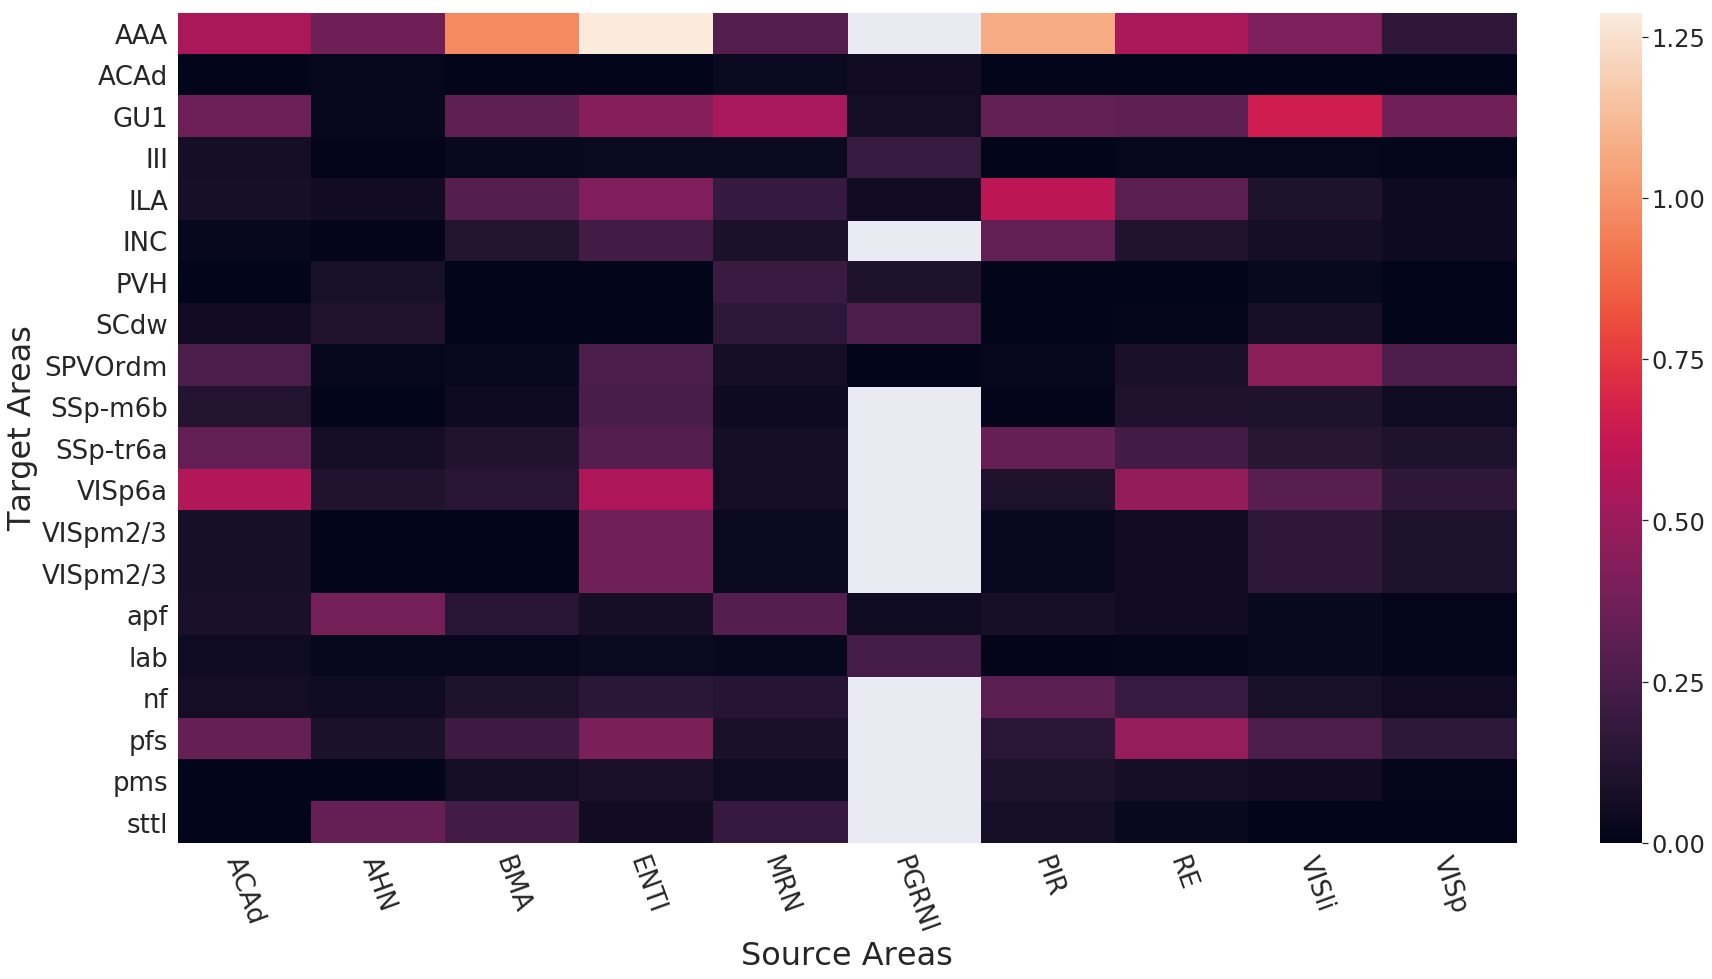

In [27]:
#df_im = pd.DataFrame(data = np.power(B, 1./3), index = sel_acros2, columns = sel_tracer)
#pk.dump(df_im, open('paper1_figures/nan_con_submat.pkl','wb'))
df_im = pk.load(open('paper1_figures/nan_con_submat.pkl','rb'))

ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 26)
ax.yaxis.set_tick_params(labelsize = 26)
sns.set(rc={'figure.figsize':(30,15.27)}, font_scale=2.2)
sns.heatmap(df_im)
plt.xticks(rotation = 290)
plt.xlabel('Source Areas', fontsize = 32)
plt.ylabel('Target Areas', fontsize = 32)
plt.savefig('paper1_figures/nan_con_imputed_step1.jpg')
plt.savefig('paper1_figures/nan_con_imputed_step1.eps')

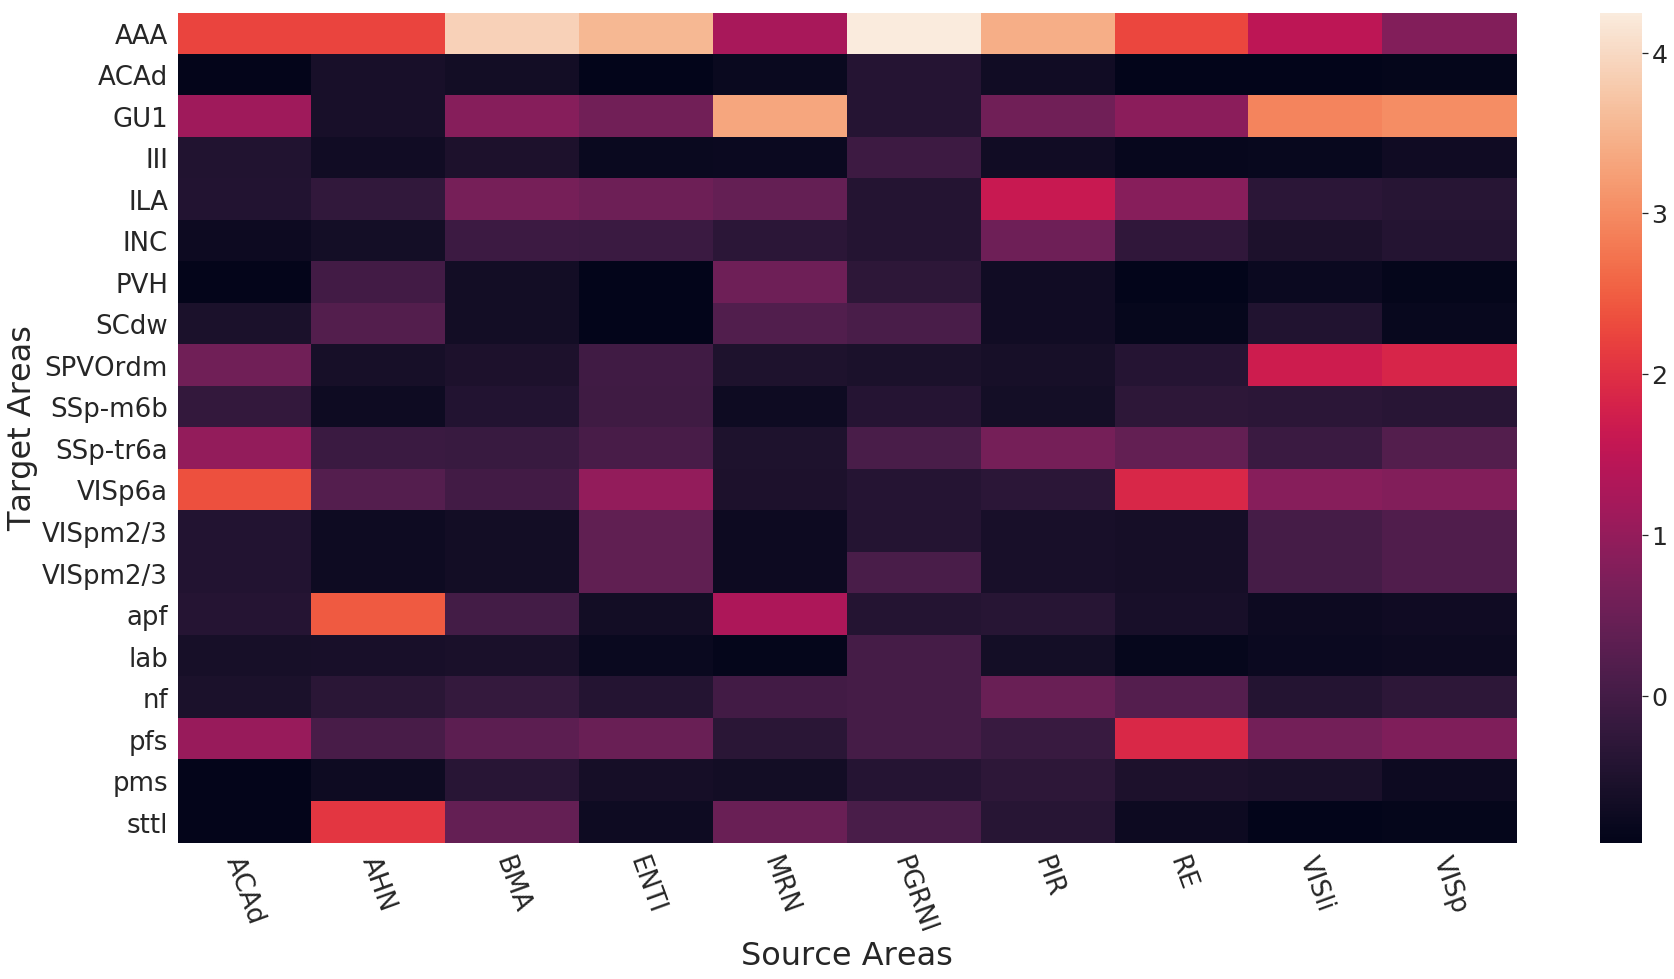

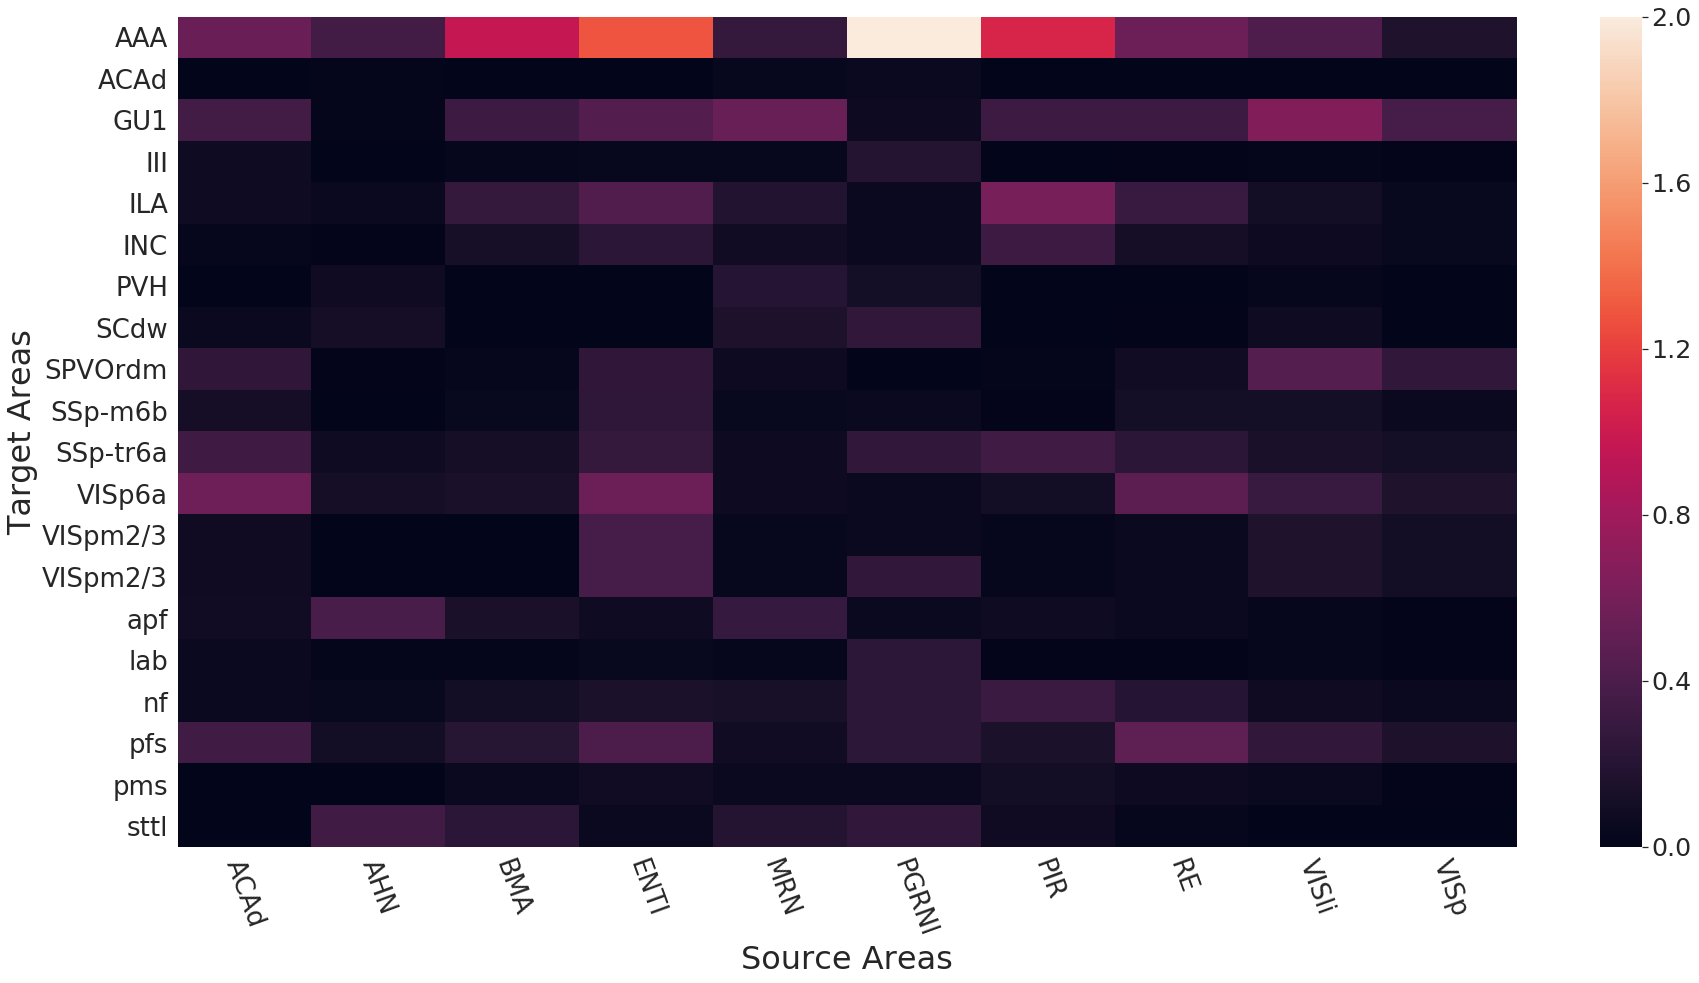

In [28]:
#df_im2 = pd.DataFrame(data = np.power(B2, 1./3), index = sel_acros2, columns = sel_tracer)
#pk.dump(df_im2, open('paper1_figures/imp_con_submat.pkl','wb'))

#df_im2 = pd.DataFrame(data = StandardScaler().fit_transform(np.power(B2, 1./3)), index = sel_acros2, columns = sel_tracer)
#pk.dump(df_im2, open('paper1_figures/zscore_con_submat.pkl','wb'))

plt.figure
df_im2 = pk.load(open('paper1_figures/zscore_con_submat.pkl','rb'))
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 26)
ax.yaxis.set_tick_params(labelsize = 26)
sns.set(rc={'figure.figsize':(30,15.27)},font_scale = 2.3)
sns.heatmap(df_im2)
plt.xticks(rotation = 290)
plt.xlabel('Source Areas', fontsize = 32)
plt.ylabel('Target Areas', fontsize = 32)
plt.savefig('paper1_figures/con_zscored.jpg')
plt.savefig('paper1_figures/con_zscored.eps')
plt.show()

plt.figure
df_im2 = pk.load(open('paper1_figures/imp_con_submat.pkl','rb'))
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 26)
ax.yaxis.set_tick_params(labelsize = 26)
sns.set(rc={'figure.figsize':(30,15.27)}, font_scale = 2.3)
sns.heatmap(df_im2)
plt.xticks(rotation = 290)
plt.xlabel('Source Areas', fontsize = 32)
plt.ylabel('Target Areas', fontsize = 32)
plt.savefig('paper1_figures/nan_con_imputed_step2.jpg')
plt.savefig('paper1_figures/nan_con_imputed_step2.eps')
plt.show()

In [96]:
'''A3 = ConStr_sqrt[list(set(acros2)),:]
B3 = A3[:,list(set(tracer2))]
plt.figure
df_im3 = pd.DataFrame(data = B3, index = sel_acros, columns = sel_tracer)
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
sns.set(rc={'figure.figsize':(30,15.27)})
sns.heatmap(df_im3)
plt.xticks(rotation = 290)
plt.xlabel('Source Areas', fontsize = 30)
plt.ylabel('Target Areas', fontsize = 30)
#plt.savefig('con_cubic_root.jpg')'''

"A3 = ConStr_sqrt[list(set(acros2)),:]\nB3 = A3[:,list(set(tracer2))]\nplt.figure\ndf_im3 = pd.DataFrame(data = B3, index = sel_acros, columns = sel_tracer)\nax = plt.gca()\nax.xaxis.set_tick_params(labelsize = 20)\nax.yaxis.set_tick_params(labelsize = 20)\nsns.set(rc={'figure.figsize':(30,15.27)})\nsns.heatmap(df_im3)\nplt.xticks(rotation = 290)\nplt.xlabel('Source Areas', fontsize = 30)\nplt.ylabel('Target Areas', fontsize = 30)\n#plt.savefig('con_cubic_root.jpg')"

In [97]:
'''A3 = ConStr_scale[list(set(acros2)),:]
B3 = A3[:,list(set(tracer2))]
plt.figure
df_im4 = pd.DataFrame(data = B3, index = sel_acros, columns = sel_tracer)
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
sns.set(rc={'figure.figsize':(30,15.27)})
sns.heatmap(df_im4)
plt.xticks(rotation = 290)
plt.xlabel('Source Areas', fontsize = 30)
plt.ylabel('Target Areas', fontsize = 30)
#plt.savefig('con_zscore.jpg')'''

"A3 = ConStr_scale[list(set(acros2)),:]\nB3 = A3[:,list(set(tracer2))]\nplt.figure\ndf_im4 = pd.DataFrame(data = B3, index = sel_acros, columns = sel_tracer)\nax = plt.gca()\nax.xaxis.set_tick_params(labelsize = 20)\nax.yaxis.set_tick_params(labelsize = 20)\nsns.set(rc={'figure.figsize':(30,15.27)})\nsns.heatmap(df_im4)\nplt.xticks(rotation = 290)\nplt.xlabel('Source Areas', fontsize = 30)\nplt.ylabel('Target Areas', fontsize = 30)\n#plt.savefig('con_zscore.jpg')"

In [99]:
'''df2 = pd.DataFrame(data = GeneExp_cube[0:20,genes], index = remaining_acronyms[0:20], columns = MesoPred.params['Gene Acronyms'][genes])
plt.figure
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
sns.set(rc={'figure.figsize':(30,15.27)})
sns.heatmap(df2)
plt.xticks(rotation = 290)
plt.xlabel('Genes', fontsize = 30)
plt.ylabel('Brain Areas', fontsize = 30)
#plt.savefig('gene_exp_cubic_root.jpg')'''

"df2 = pd.DataFrame(data = GeneExp_cube[0:20,genes], index = remaining_acronyms[0:20], columns = MesoPred.params['Gene Acronyms'][genes])\nplt.figure\nax = plt.gca()\nax.xaxis.set_tick_params(labelsize = 20)\nax.yaxis.set_tick_params(labelsize = 20)\nsns.set(rc={'figure.figsize':(30,15.27)})\nsns.heatmap(df2)\nplt.xticks(rotation = 290)\nplt.xlabel('Genes', fontsize = 30)\nplt.ylabel('Brain Areas', fontsize = 30)\n#plt.savefig('gene_exp_cubic_root.jpg')"

In [100]:
'''df2 = pd.DataFrame(data = GeneExp_zscore[0:20,genes], index = remaining_acronyms[0:20], columns = MesoPred.params['Gene Acronyms'][genes])
plt.figure
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 20)
ax.yaxis.set_tick_params(labelsize = 20)
sns.set(rc={'figure.figsize':(30,15.27)})
sns.heatmap(df2)
plt.xticks(rotation = 290)
plt.xlabel('Genes', fontsize = 30)
plt.ylabel('Brain Areas', fontsize = 30)
plt.savefig('gene_exp_zscore.jpg')'''

"df2 = pd.DataFrame(data = GeneExp_zscore[0:20,genes], index = remaining_acronyms[0:20], columns = MesoPred.params['Gene Acronyms'][genes])\nplt.figure\nax = plt.gca()\nax.xaxis.set_tick_params(labelsize = 20)\nax.yaxis.set_tick_params(labelsize = 20)\nsns.set(rc={'figure.figsize':(30,15.27)})\nsns.heatmap(df2)\nplt.xticks(rotation = 290)\nplt.xlabel('Genes', fontsize = 30)\nplt.ylabel('Brain Areas', fontsize = 30)\nplt.savefig('gene_exp_zscore.jpg')"

<Figure size 864x432 with 0 Axes>

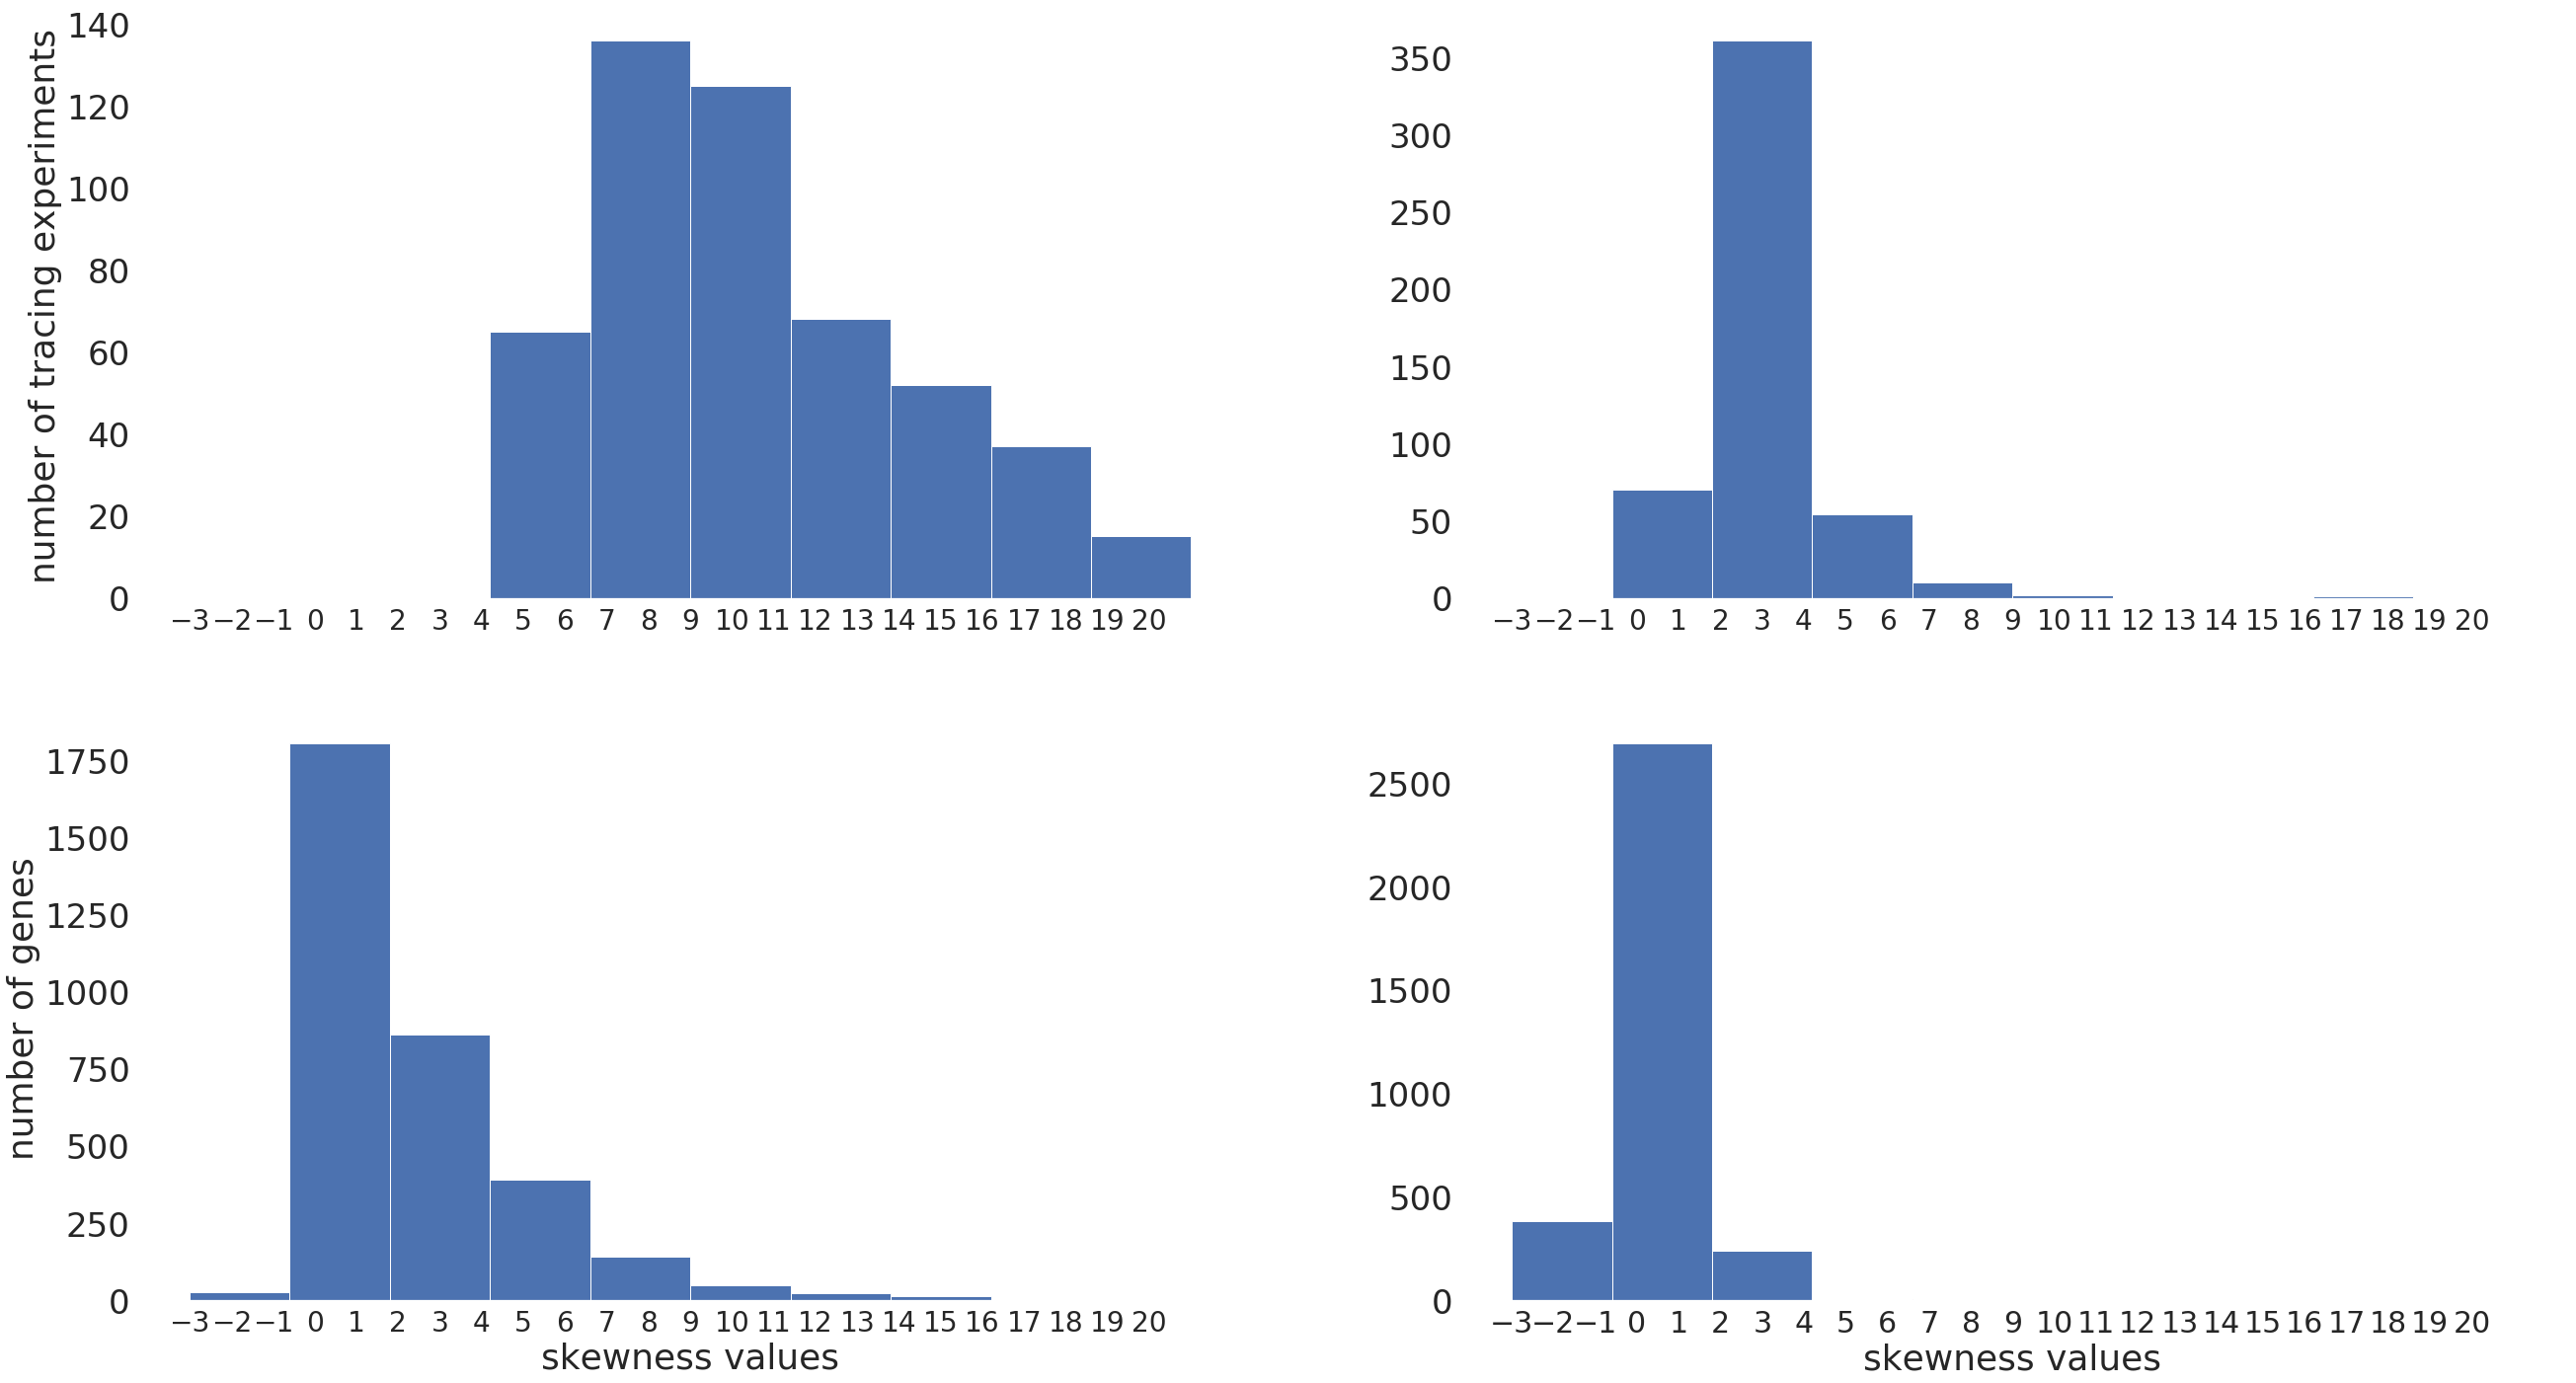

In [105]:
#pk.dump([ConStr_im2,ConStr_sqrt,GeneExp_im2,GeneExp_cube], open('paper1_figures/skewness_with_transformation.pkl','wb'))

[ConStr_im2,ConStr_sqrt,GeneExp_im2,GeneExp_cube] = pk.load(open('paper1_figures/skewness_with_transformation.pkl','rb'))
plt.figure(figsize = (12,6))
rwidth = 1.0
bins = 20
fig, axs = plt.subplots(2, 2, sharey = False, sharex = False, figsize=(44,24))
ax = plt.gca()
ax.xaxis.set_tick_params(labelsize = 30)
ax.yaxis.set_tick_params(labelsize = 30)
plt.setp(axs, xticks = np.arange(-4,22,1))
axs[0,0].hist(sci.stats.skew(ConStr_im2),rwidth = rwidth, range = (-3,21))
axs[0,0].set_xticks(np.arange(-3,21,1))
axs[0,0].set_ylabel('number of tracing experiments', fontsize = 36)
axs[0,0].tick_params(axis = "y", labelsize = 34)
axs[0,0].tick_params(axis = "x", labelsize = 28)
#axs[0,1].title('Skewness distribution before transformation - Wild-type tracers')
#plt.figure(figsize = (12,6))
axs[0,1].hist(sci.stats.skew(ConStr_sqrt),rwidth = rwidth, range = (-3,21))
axs[0,1].set_xticks(np.arange(-3,21,1))
axs[0,1].tick_params(axis = "y", labelsize = 34)
axs[0,1].tick_params(axis = "x", labelsize = 28)
axs[1,0].hist(sci.stats.skew(GeneExp_im2),rwidth = rwidth, range = (-3,21))
axs[1,0].set_xticks(np.arange(-3,21,1))
axs[1,0].set_ylabel('number of genes', fontsize = 36)
axs[1,0].set_xlabel('skewness values', fontsize = 36)
axs[1,0].tick_params(axis = "y", labelsize = 34)
axs[1,0].tick_params(axis = "x", labelsize = 28)
#plt.title('Skewness distribution before transformation - Gene Expression')
#plt.figure(figsize = (12,6))
axs[1,1].hist(sci.stats.skew(GeneExp_cube),rwidth = rwidth, range = (-3,21))
axs[1,1].set_xticks(np.arange(-3,21,1))
axs[1,1].tick_params(axis = "y", labelsize = 34)
axs[1,1].set_xlabel('skewness values', fontsize = 36)
#plt.title('Skewness distribution after transformation - Gene Expression')

plt.savefig('paper1_figures/Skewness_with_transformation.jpg')
plt.savefig('paper1_figures/Skewness_with_transformation.eps')

PrimaryLibrary.ipynb:49: RuntimeWarning: divide by zero encountered in divide
  "    fp = open(filename,'rb')\n",


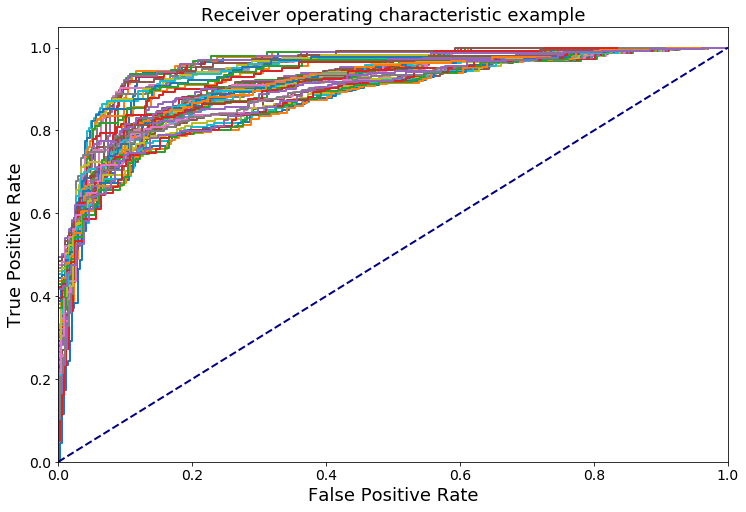

ROC curve (area = 0.948379387603, external threshold = 76, internal threshold = 0.618018844852)


In [145]:
cutoff_collector = MesoPred.Convert2ROC(ClfResults_ridge['Nr5a1-Cre']['y_actual'],ClfResults_ridge['Nr5a1-Cre']['y_preds'])

## Warning !! 3 - 06 - 2019 -> 
This is highly experimental and will be moved in another notebook during the near future
I am working on pairwise predictions with spatial modules using the kronecker product

In [202]:
from sklearn.metrics.pairwise import pairwise_kernels
Code = pk.load(open('saves/Code.pkl','rb'))
X = Code
Y = Code[0,:]
KernelMat = np.kron(Code,Code)
C = ClfResults_ridge['wild_type']['y_actual']
C2 = np.reshape(C, (len(C)*len(C[0]), 1))       

In [204]:
np.shape(KernelMat), np.shape(C2)

((183184, 40000), (213144, 1))

In [190]:
np.shape(Code), np.shape(C)

((428, 200), (428, 498))